In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"D:\learning\machine learning\sem-5-ML-PBL\heart.csv")

# *Data Analysis*

---

In [3]:
target=data['target']

In [4]:
print(data[['sex','age']])

      sex  age
0       1   52
1       1   53
2       1   70
3       1   61
4       0   62
...   ...  ...
1020    1   59
1021    1   60
1022    1   47
1023    0   50
1024    1   54

[1025 rows x 2 columns]


In [5]:
d=data[['age','trestbps','chol','thalach']]

<Axes: >

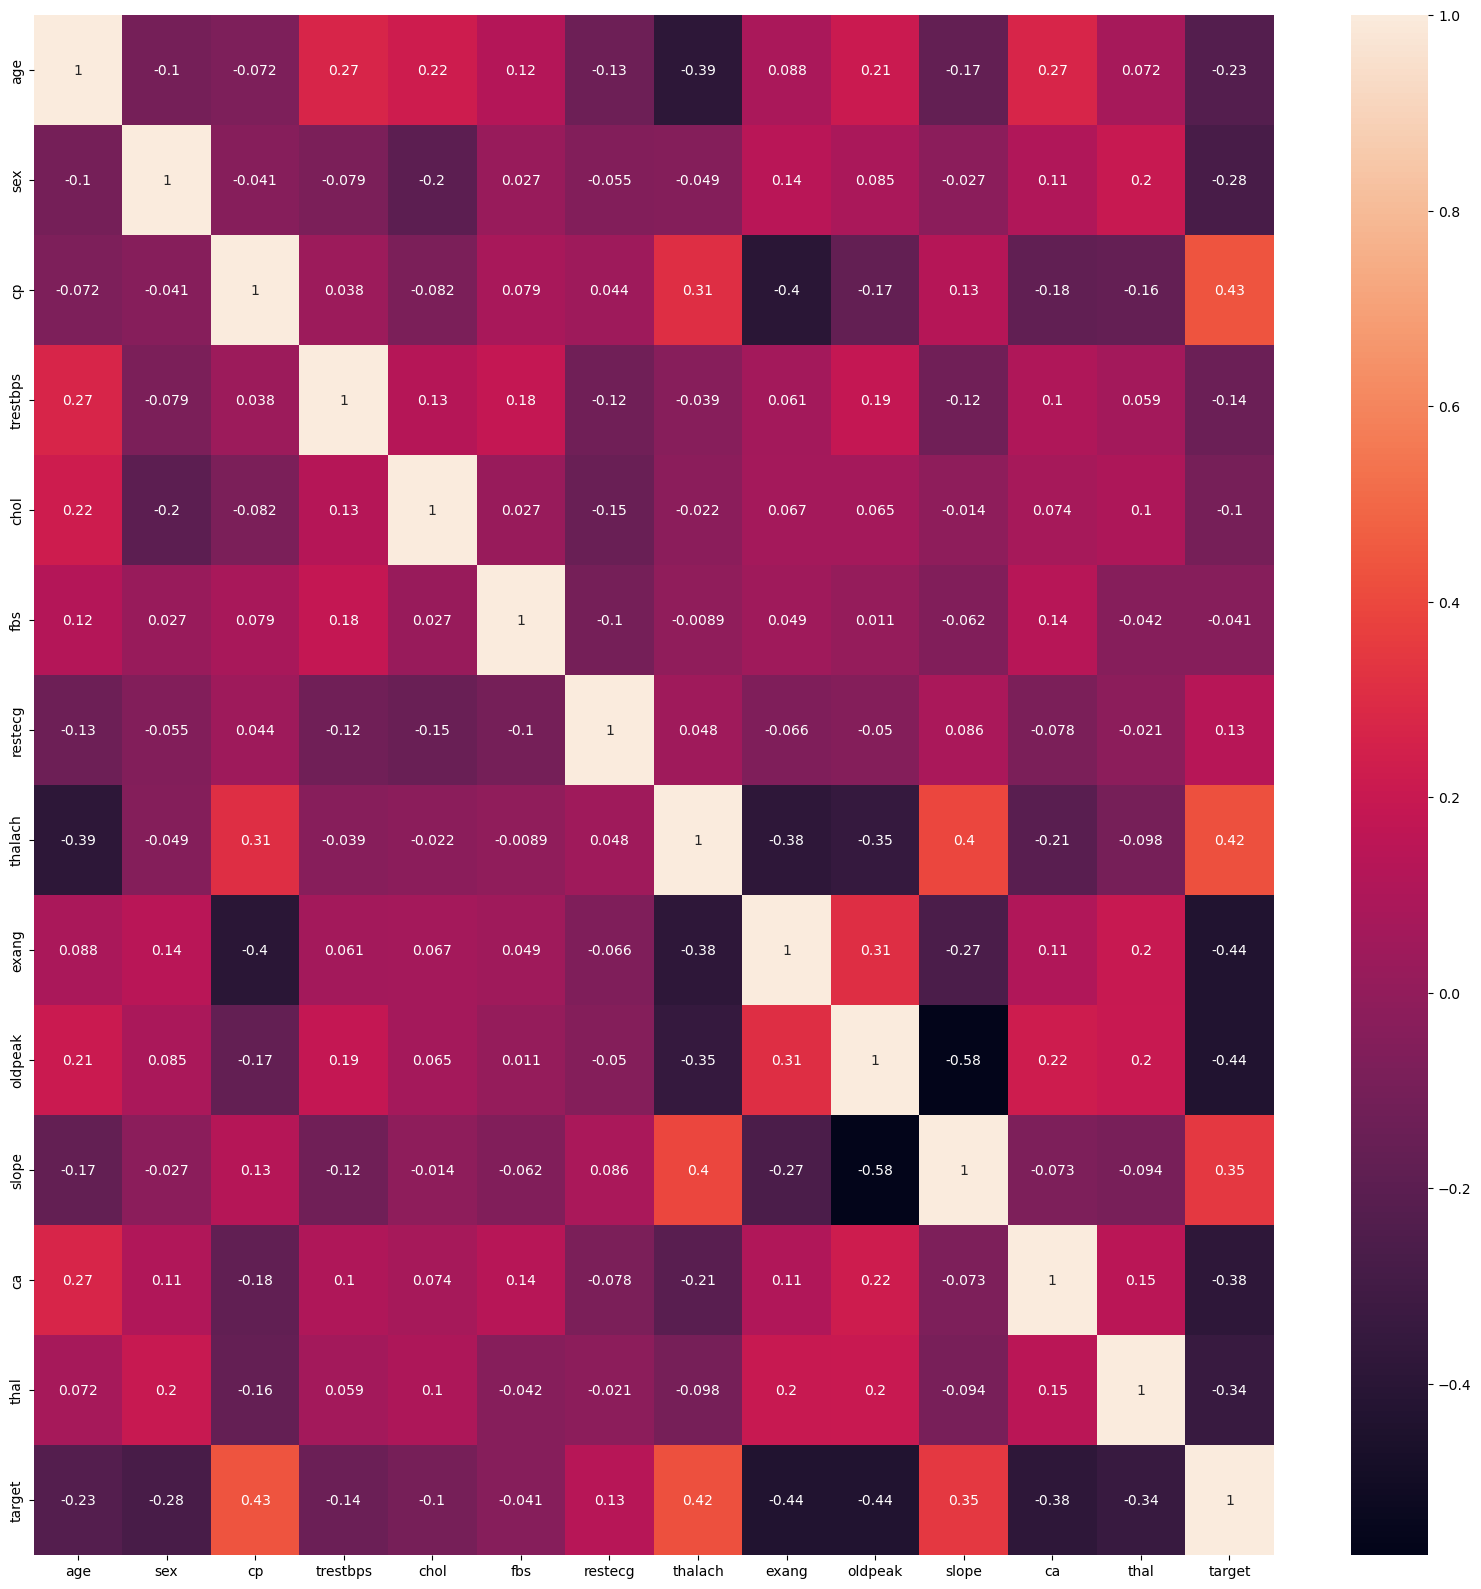

In [7]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data=data[data.columns].corr(), annot=True)

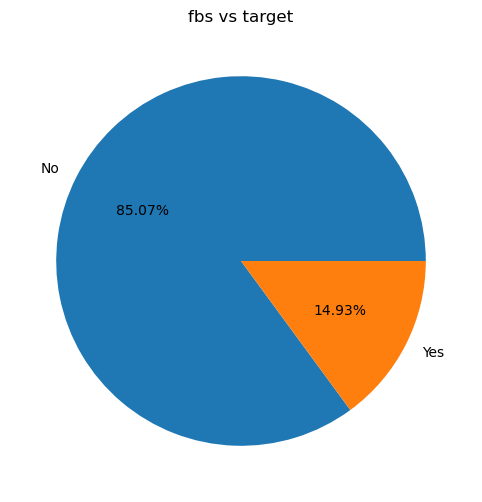

In [8]:
plt.figure(figsize=(10,6))
plt.pie(data['fbs'].value_counts(),labels=['No','Yes'],autopct='%.2f%%')
plt.title('fbs vs target')
plt.show()

In [5]:
scaler=StandardScaler()
new_data=scaler.fit_transform(d)

In [6]:
scaled_data=pd.DataFrame(new_data,columns=['age','trestbps','chol','thalach'])

In [7]:
# scaled_data.set_index()
discrete_data=data.iloc[:,[1,2,5,6,8,9,10,11,12]]

In [8]:
data=pd.concat([discrete_data,scaled_data,target],axis=1)

In [9]:
display(data.iloc[0:10])

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age,trestbps,chol,thalach,target
0,1,0,0,1,0,1.0,2,2,3,-0.268437,-0.377636,-0.659332,0.821321,0
1,1,0,1,0,1,3.1,0,0,3,-0.158157,0.479107,-0.833861,0.255968,0
2,1,0,0,1,1,2.6,0,0,3,1.716595,0.764688,-1.396233,-1.048692,0
3,1,0,0,1,0,0.0,2,1,3,0.724079,0.936037,-0.833861,0.516900,0
4,0,0,1,1,0,1.9,1,3,2,0.834359,0.364875,0.930822,-1.874977,0
5,0,0,0,0,0,1.0,1,0,2,0.393241,-1.805540,0.038784,-1.179158,1
6,1,0,0,2,0,4.4,0,3,1,0.393241,-1.005914,1.396233,-0.396362,0
7,1,0,0,0,1,0.8,1,1,3,0.062402,1.621431,0.833861,-0.178919,0
8,1,0,0,0,0,0.8,2,0,3,-0.930114,-0.663216,0.058176,-0.222407,0
9,1,0,0,0,1,3.2,1,2,2,-0.047877,-0.548984,0.775685,-1.440090,0


In [10]:
numpy_data=np.array(data)

In [11]:
numpy_data.shape

(1025, 14)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(numpy_data[:,0:-1],numpy_data[:,-1],train_size=0.80,random_state=10)

In [13]:
x_test,x_devset,y_test,y_devset=train_test_split(X_test,Y_test,test_size=0.50,random_state=1)

In [16]:
x_train,x_train_add,y_train,y_train_add=train_test_split(X_train,Y_train,test_size=0.2,random_state=1)

In [17]:
print(x_train.shape,x_train_add.shape)

(656, 13) (164, 13)


In [18]:
x_train_total=np.concatenate([x_train,x_train_add],axis=0)
y_train_total=np.concatenate([y_train,y_train_add])
print(x_train_total.shape,y_train_total.shape)

(820, 13) (820,)


# *Model Building*

---

In [19]:
classifier=LogisticRegressionCV()

In [20]:
classifier.fit(x_train,y_train)

LogisticRegressionCV()

In [21]:
classifier.coef_

array([[-1.70215276,  0.8472305 , -0.08320335,  0.47531658, -0.89222399,
        -0.5318736 ,  0.63548833, -0.70660456, -0.78815208, -0.01963371,
        -0.4425832 , -0.23206442,  0.70129445]])

In [22]:
y_predicted=classifier.predict(x_devset)

In [23]:
y_devset

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1.])

In [24]:
classifier2=LogisticRegressionCV()

In [25]:
classifier2.fit(x_train_total,y_train_total)

LogisticRegressionCV()

# *Validation*

---

In [26]:
classifier.score(x_train,y_train)

0.8597560975609756

In [27]:
classifier2.score(x_train,y_train)

0.8414634146341463

In [28]:
classifier.score(x_devset,y_devset)

0.8155339805825242

In [29]:
classifier2.score(x_devset,y_devset)

0.8155339805825242

In [30]:
y_train_pred=classifier.predict(x_train)

In [31]:
y_train_pred_total=classifier2.predict(x_train_total)

In [86]:
accuracy_score(y_devset,y_predicted)

0.8155339805825242

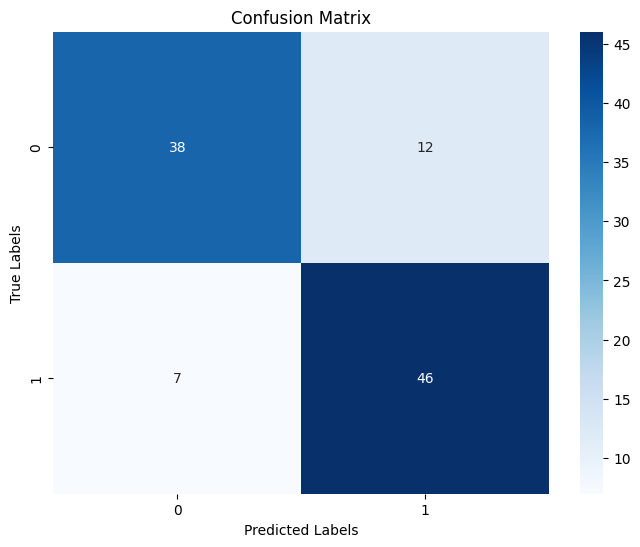

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained your Logistic Regression model and obtained predicted_y
# predicted_y contains the predicted labels from your model

cm = confusion_matrix(y_devset,y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [87]:
accuracy_score(y_train_total,y_train_pred_total)

0.8524390243902439

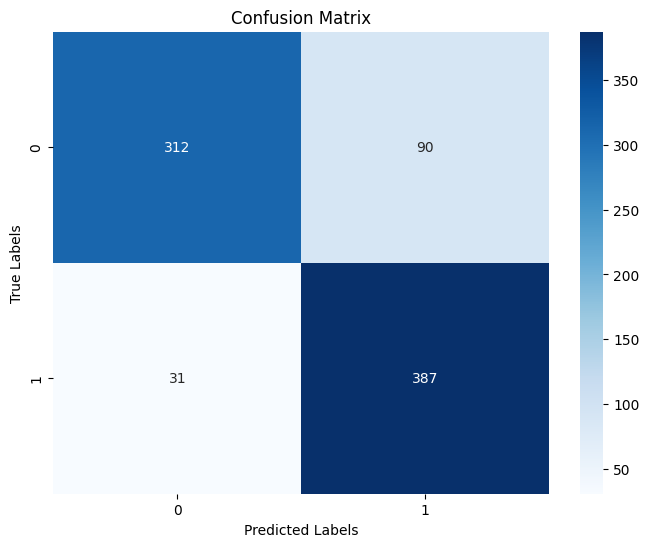

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained your Logistic Regression model and obtained predicted_y
# predicted_y contains the predicted labels from your model

cm = confusion_matrix(y_train_total,y_train_pred_total)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.metrics import f1_score,precision_recall_curve,precision_score,recall_score,accuracy_score

In [35]:
accuracy_score(y_devset,y_predicted)

0.8155339805825242

In [36]:
accuracy_score(y_train,y_train_pred)

0.8597560975609756

---


---

# *Neural Networks*

In [55]:
model_nn=tf.keras.Sequential([
    tf.keras.layers.Dense(units=25,activation="relu"),
    tf.keras.layers.Dense(units=15,activation='relu'),
    tf.keras.layers.Dense(units=5,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [56]:
model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss=tf.keras.losses.BinaryCrossentropy())

In [57]:
model_nn.fit(x_train_total,y_train_total)

26/26 [==============================] - 1s 2ms/step - loss: 0.5076


In [60]:
temp=model_nn.predict(x_devset)

4/4 [==============================] - 0s 3ms/step


In [75]:
temp2=model_nn.predict(x_train)

21/21 [==============================] - 0s 1ms/step


In [69]:
y_nn_pred=[]
for i in temp:
    if i>=0.46:
        y_nn_pred.append(1)
    else:
        y_nn_pred.append(0)
y_nn_pred=np.array(y_nn_pred)


In [83]:
y_train_nn_pred=[]
for i in temp2:
    if i>=0.46:
        y_train_nn_pred.append(1)
    else:
        y_train_nn_pred.append(0)
y_train_nn_pred=np.array(y_train_nn_pred)


In [70]:
y_nn_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

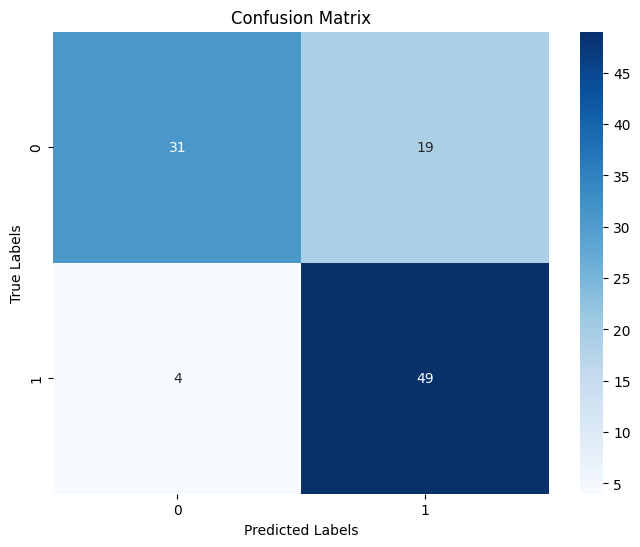

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained your Logistic Regression model and obtained predicted_y
# predicted_y contains the predicted labels from your model

cm = confusion_matrix(y_devset,y_nn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [72]:
accuracy_score(y_devset,y_nn_pred)

0.7766990291262136

In [84]:
accuracy_score(y_train,y_train_nn_pred)

0.7896341463414634

In [5]:
import numpy as np
import time

In [4]:
x=np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])
print(np.random.permutation(x))

[[4 5]
 [0 1]
 [2 3]
 [6 7]
 [8 9]]


In [36]:
arr=np.random.rand(10000000)

In [37]:
lst=list(arr)

In [38]:
type(lst)

list

In [61]:
tic=time.time()
print(lst[8979])
toc=time.time()
print('time taken=',str(1000*(toc-tic))+'ms')

0.0008893961054852184
time taken= 0.0ms


In [63]:
tic=time.time()
print(arr[8690189])
toc=time.time()
print('time taken=',str(1000*(toc-tic))+'ms')

0.6652147522652645
time taken= 0.0ms


In [1]:
import numpy as np

In [6]:
(np.random.randn(3,3)*np.random.randn(3,2)).shape

ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

In [13]:
np.random.rand(3,3)

array([[0.02299814, 0.15734836, 0.316658  ],
       [0.17538803, 0.23149844, 0.39734771],
       [0.31467925, 0.02336376, 0.03957363]])

In [2]:
s=np.array([[1,2],[1,2]])

In [5]:
s

array([[1, 2],
       [1, 2]])

In [4]:
np.dot(s,s)

array([[3, 6],
       [3, 6]])

In [7]:
a=np.array([1,2,3])
b=np.array([2,2,2])

In [8]:
np.dot(a,b)

12

In [13]:
a @ b

12

In [9]:
s=np.array([[1],[2],[3]])
a=np.array([[[2],[2],[2]],[[2],[2],[2]]])

In [25]:
s.shape

(3, 1)

In [26]:
a.shape

(1, 3)

In [10]:
z=s*a

In [12]:
z

array([[[2],
        [4],
        [6]],

       [[2],
        [4],
        [6]]])

In [23]:
z.shape

(2, 3, 1)

In [20]:
np.sum(z,axis=1)

array([[12],
       [12]])

In [21]:
s=np.array([[1],[2],[3]])
a=np.array([[2,2,2]])

In [22]:
s*a

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [27]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])

In [28]:
X*w

array([[ 1. , -2. , -1. ],
       [ 6. ,  1. , -6.4]])

In [51]:
np.sum(X*w,axis=0,keepdims=True)+b

array([[ 8.5,  0.5, -5.9]])

In [52]:
l=sigmoid(np.sum(X*w,axis=0,keepdims=True)+b)

In [61]:
l[0].shape

(3,)

In [54]:
np.sum((l-Y))

-0.37501213501318953

In [55]:
cost=np.sum(-(Y*(np.log(l))+((1-Y)*(np.log(1-l))))/X.shape[0]                              )


In [56]:
cost

0.2385080656153861

In [57]:
Y

array([[1, 1, 0]])

In [58]:
l-Y

array([[-2.03426978e-04, -3.77540669e-01,  2.73196076e-03]])

In [59]:
np.dot(X,(l-Y).T)/X.shape[0]

array([[ 0.37607297],
       [-0.09906144]])

In [60]:
np.sum(l-Y)

-0.37501213501318953

In [64]:
s=np.random.rand(1,10)

In [68]:
s[s>0.5]=1

SyntaxError: invalid syntax (2748350592.py, line 1)

In [69]:
s

array([[0.49549663, 0.16366515, 0.35597541, 0.20824122, 0.24983807,
        0.17602894, 0.42462855, 0.22510786, 0.1857576 , 1.        ]])

In [73]:
(s<0.5)*2.0

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 0.]])

In [1]:
l=[24,20,21,23,26,19,32,22,36]

In [3]:
s=sorted(l)[-7::1]

In [5]:
sum(s)/7

26.285714285714285